In [2]:
# https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction

In [3]:
! gdown --id 19CPF_ciO2dZvqQJXOtpHRXu4VnpOAYmR

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19CPF_ciO2dZvqQJXOtpHRXu4VnpOAYmR
To: /content/Customertravel.csv
100% 29.6k/29.6k [00:00<00:00, 42.3MB/s]


In [4]:
# Устанавливаем библиотеки для исследовательского анализа данных и машинного обучения.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [5]:
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [7]:
# Загружаем данные.
df = pd.read_csv('Customertravel.csv')

In [8]:
# Смотрим первые 5 строк датафрейма.
df.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
# Названия столбцов:
# 'Age' - Возраст пользователя
# 'FrequentFlyer' - Часто ли клиент летает
# 'AnnualIncomeClass' - Класс годового дохода пользователя
# 'ServicesOpted' - Количество раз, когда услуги были выбраны за последние годы
# 'AccountSyncedToSocialMedia' - Синхронизирована ли учетная запись компании пользователя с его социальными сетями
# 'BookedHotelOrNot' - Бронирует ли клиент жилье/гостиницу, используя услуги компании
# 'Target' - 1- Клиенты уходят 0- Клиенты не уходят

In [ ]:
# Посмотрим размер датафрейма и тивы данных в столбцах.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [16]:
# Проверим данные на наличие дубликатов.
df.duplicated().sum()

507

In [ ]:
# Получается 507 дубликатов.
# в этой ситуации это нормально, поскольку клиенты обезличены, то это просто похожие клиенты

In [17]:
# Посмотрим пропущенные значения
df.isnull().sum()

,0
Age,0
FrequentFlyer,0
AnnualIncomeClass,0
ServicesOpted,0
AccountSyncedToSocialMedia,0
BookedHotelOrNot,0
Target,0


In [ ]:
# Пропущенных значений нет.

In [15]:
# Наша целевая переменная - это 'Target'.
# Посмотри сколько всего человек перестало пользоваться услугами турфирмы
print ('Кол-во ушедших клиентов:', df['Target'].sum())

# Посчитаем сколько клиентов перестали пользоваться услугами турфирмы, в процентах:
print ('Процент ушедших клиентов:', ((df['Target'].sum()*100)/len(df)).round(2))

Кол-во ушедших клиентов: 224
Процент ушедших клиентов: 23.48


<Axes: >

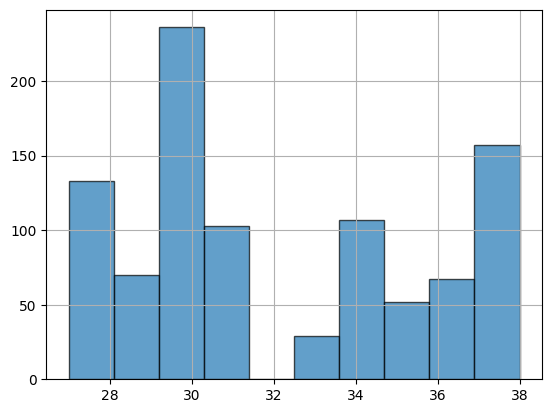

In [ ]:
# Посмотрим на распределение возраста клиентов.
df['Age'].hist(bins=10, edgecolor='black', alpha=0.7)

In [ ]:
# Оно интересное, возраст клиента от 27 до 38 лет.

In [26]:
# Проводем анализ столбцов.
# Посчитаем долю клиентов, по каждому уникальному значению признака.

# FrequentFlyer - Проверим, как влияет статус "частый пассажир" на вероятность оттока:
churn_by_frequent_flyer = (df.groupby('FrequentFlyer')['Target'].mean()*100).reset_index()
print(churn_by_frequent_flyer)

  FrequentFlyer     Target
0            No  11.348684
1     No Record  13.333333
2           Yes  51.398601


In [27]:
# AnnualIncomeClass - Проверим, как класс дохода влияет на вероятность оттока:
churn_by_income = (df.groupby('AnnualIncomeClass')['Target'].mean()*100).reset_index()
print(churn_by_income)

  AnnualIncomeClass     Target
0       High Income  57.861635
1        Low Income  26.943005
2     Middle Income   6.845966


In [29]:
# ServicesOpted - Проверим, как количество выбранных услуг влияет на вероятность оттока:
churn_by_services = (df.groupby('ServicesOpted')['Target'].mean()*100).reset_index()
print(churn_by_services)

   ServicesOpted     Target
0              1  23.019802
1              2  29.545455
2              3   8.064516
3              4  18.803419
4              5  37.681159
5              6  32.812500


In [30]:
# AccountSyncedToSocialMedia - Проверим, влияет ли синхронизация аккаунта с социальными сетями:
churn_by_sync = (df.groupby('AccountSyncedToSocialMedia')['Target'].mean()*100).reset_index()
print(churn_by_sync)

  AccountSyncedToSocialMedia     Target
0                         No  21.043771
1                        Yes  27.500000


In [31]:
# BookedHotelOrNot - Проверим, влияет ли бронирование отеля:
churn_by_hotel = (df.groupby('BookedHotelOrNot')['Target'].mean()*100).reset_index()
print(churn_by_hotel)

  BookedHotelOrNot     Target
0               No  30.555556
1              Yes  12.698413


In [ ]:
# Машинное обучение.

In [32]:
# Сначала преобразуем наш датафрейм.
# Применение One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)  # drop_first удаляет одну колонку для избежания мультиколлинеарности
df.head(5)

,Age,ServicesOpted,Target,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
0,34,6,0,False,False,False,True,False,True
1,34,5,1,False,True,True,False,True,False
2,37,3,0,False,False,False,True,True,False
3,30,2,0,False,False,False,True,False,False
4,30,1,0,False,False,True,False,False,False


In [ ]:
# Разделение данных на признаки и целевую переменную
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Таблица результатов работы моделей.
results = {
    "Model": [],
    "Accuracy": [],
    "ROC-AUC": []
}

In [ ]:
# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
results["Model"].append("Logistic Regression")
results["Accuracy"].append(accuracy_score(y_test, y_pred_log_reg))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_log_reg))

In [ ]:
# Случайный лес
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results["Model"].append("Random Forest")
results["Accuracy"].append(accuracy_score(y_test, y_pred_rf))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_rf))

In [ ]:
# Градиентный бустинг (XGBoost)
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
results["Model"].append("XGBoost")
results["Accuracy"].append(accuracy_score(y_test, y_pred_xgb))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_xgb))

In [ ]:
# Градиентный бустинг (XGBoost)
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
results["Model"].append("XGBoost")
results["Accuracy"].append(accuracy_score(y_test, y_pred_xgb))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_xgb))

In [ ]:
# Метод опорных векторов (SVM)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results["Model"].append("SVM")
results["Accuracy"].append(accuracy_score(y_test, y_pred_svm))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_svm))

In [ ]:
# Метод k-ближайших соседей (k-NN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results["Model"].append("k-NN")
results["Accuracy"].append(accuracy_score(y_test, y_pred_knn))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_knn))

In [ ]:
# Нейронная сеть (MLPClassifier)
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
results["Model"].append("Neural Network")
results["Accuracy"].append(accuracy_score(y_test, y_pred_mlp))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_mlp))

In [ ]:
# Gradient Boosting Machines (LightGBM)
lgbm = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
results["Model"].append("LightGBM")
results["Accuracy"].append(accuracy_score(y_test, y_pred_lgbm))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 186, number of negative: 577
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 763, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.243775 -> initscore=-1.132096
[LightGBM] [Info] Start training from score -1.132096
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
# CatBoost
catboost = CatBoostClassifier(random_state=42, iterations=100, learning_rate=0.1, depth=6, verbose=False)
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)
results["Model"].append("CatBoost")
results["Accuracy"].append(accuracy_score(y_test, y_pred_catboost))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_catboost))

In [ ]:
# AdaBoost (Adaptive Boosting)
ada = AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
results["Model"].append("AdaBoost")
results["Accuracy"].append(accuracy_score(y_test, y_pred_ada))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_ada))

In [ ]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
results["Model"].append("Decision Tree")
results["Accuracy"].append(accuracy_score(y_test, y_pred_tree))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_tree))

In [ ]:
# Extra Trees Classifier
extra_trees = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=5)
extra_trees.fit(X_train, y_train)
y_pred_extra_trees = extra_trees.predict(X_test)
results["Model"].append("Extra Trees")
results["Accuracy"].append(accuracy_score(y_test, y_pred_extra_trees))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_extra_trees))

In [ ]:
# Создание DataFrame с результатами работы всех алгоритмов.
results_df = pd.DataFrame(results)

# Отсортировать по Accuracy (от лучшего к худшему)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
results_df

,Model,Accuracy,ROC-AUC
0,XGBoost,0.900524,0.809340
1,LightGBM,0.900524,0.819229
2,CatBoost,0.890052,0.792914
3,k-NN,0.874346,0.773220
4,Random Forest,0.869110,0.760062
5,Decision Tree,0.869110,0.779842
6,Logistic Regression,0.848168,0.737100
7,Neural Network,0.848168,0.746990
8,Extra Trees,0.837696,0.671225
9,AdaBoost,0.832461,0.677847


In [ ]:
# Наишлучший результат показали алгоритмы: XGBoost и LightGBM.

In [ ]:
# Проведем анализ важности признаков, используя алгоритмы машинного обучения.
# Большинство алгоритмов машинного обучения позволяют оценить, какие признаки наиболее сильно влияют на предсказания. Это поможет выявить категории клиентов, которые чаще уходят.

# a) Для деревьев решений и ансамблей:
# Пример для Random Forest
importances = xgb.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
3,FrequentFlyer_Yes,0.511340
1,ServicesOpted,0.107846
6,AccountSyncedToSocialMedia_Yes,0.105198
4,AnnualIncomeClass_Low Income,0.098604
5,AnnualIncomeClass_Middle Income,0.051391
0,Age,0.051364
7,BookedHotelOrNot_Yes,0.040886
2,FrequentFlyer_No Record,0.033371


In [ ]:
# Как видно из представленной таблицы самым выжным признаком, влияющим на отток клиентов является FrequentFlyer.
# Т.е. чем чаще летает клиент компании - тем больше вероятность, что он в скоро будущем перестанет быть клиентов компании.
# Это и подтверждается выводом из модели Logistic Regression, которая присваивает FrequentFlyer 1,80 балла "важности".

In [ ]:
# b) Для линейных моделей (Logistic Regression):
# В логистической регрессии коэффициенты показывают, как каждый признак влияет на вероятность оттока.
# Коэффициенты модели
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
3,FrequentFlyer_Yes,1.801665
6,AccountSyncedToSocialMedia_Yes,0.719564
1,ServicesOpted,0.332281
0,Age,-0.134540
2,FrequentFlyer_No Record,-0.208063
4,AnnualIncomeClass_Low Income,-0.247416
7,BookedHotelOrNot_Yes,-0.910920
5,AnnualIncomeClass_Middle Income,-1.269942


**Общие выводы.**

На основе анализа данных, категории клиентов, наиболее склонные к уходу:

**Статус "Частый пассажир" (FrequentFlyer):**

- Клиенты с отметкой Yes (частые пассажиры) имеют самую высокую вероятность оттока (51.4%). Это подтверждается как исследовательским анализом данных, так и алгоритмами машинного обучения.



**Класс дохода (AnnualIncomeClass):**

- Клиенты с высоким доходом (High Income) чаще уходят (57.9%).


**Количество выбранных услуг (ServicesOpted):**

- Клиенты, выбравшие 5 услуг имеют высокую вероятность оттока 37.7%

**Синхронизация аккаунта с социальными сетями (AccountSyncedToSocialMedia):**

- Клиенты, синхронизировавшие аккаунт (Yes), чаще уходят (27.5%) по сравнению с теми, кто этого не сделал (No — 21.0%).


**Бронирование отеля (BookedHotelOrNot):**

- Клиенты, которые не бронируют отели (No), чаще уходят (30.6%) по сравнению с теми, кто бронирует (Yes — 12.7%).

**Выводы по данным:**
1. Складывается впечатление, что туристическая фирма не умеет работать с платежеспособными и активными клиентам. Не умение работать заключается в том, что компания оказывается богатым клиентам услуги не надлежащего качества, что и является основной причиной оттока клиетов.
2. Основной сегмент - это клиенты с турами 1 -2 раза в год, со средним доходом и небольшим бюджетом.

Анализировав данные я увидел рамки по возрасту клиентов, от 27 до 38 лет и предположил, что данные которые я анализировал принадлежат не классической туристической фирме, а компании, которая занимается организацией командировок, бизнес-туров. Тогда возрастные рамки  и количество туров в год равное 6-ти кажутся уже более логичными.
